In [342]:
import numpy
import scipy.io
import math
import geneNewData

def main():
    myID='5603'
    geneNewData.geneData(myID)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train'+myID+'.mat')
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train'+myID+'.mat')
    Numpyfile2 = scipy.io.loadmat('digit0_testset'+'.mat')
    Numpyfile3 = scipy.io.loadmat('digit1_testset'+'.mat')
    train0 = Numpyfile0.get('target_img')
    train1 = Numpyfile1.get('target_img')
    test0 = Numpyfile2.get('target_img')
    test1 = Numpyfile3.get('target_img')
    print([len(train0),len(train1),len(test0),len(test1)])
    print('Your trainset and testset are generated successfully!')
    pass


if __name__ == '__main__':
    main()

[5000, 5000, 980, 1135]
Your trainset and testset are generated successfully!


In [343]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

import os 

In [344]:
train0 = scipy.io.loadmat('digit0_stu_train5603')['target_img']
train1 = scipy.io.loadmat('digit1_stu_train5603')['target_img']
test0 = scipy.io.loadmat('digit0_testset')['target_img']
test1 = scipy.io.loadmat('digit1_testset')['target_img']

In [345]:
print(f'size of train0: {len(train0)}')
print(f'size of train1: {len(train1)}')
print(f'size of test0: {len(test0)}')
print(f'size of test1: {len(test1)}')

#train0 = np.moveaxis(train0,[0,1,2],[2,1,0])
#train1 = np.moveaxis(train0,[0,1,2],[2,1,0])

train_tup = (train0,train1)


size of train0: 5000
size of train1: 5000
size of test0: 980
size of test1: 1135


In [346]:
np.sum(train0[0].flatten())

26355

In [347]:
def make_df(dataset,target):
    mean = []
    std = []
    values = []
    for row in dataset:
        mean.append(np.mean(row))
        std.append(np.std(row))
        values.append(row.flatten())
    df = pd.DataFrame()
    df['values'] = values
    df['f1'] = mean
    df['mf1'] = np.mean(mean)
    df['vf1'] = np.var(mean)

    df['f2'] = std
    df['mf2'] = np.mean(std)
    df['vf2'] = np.var(std)

    df['target'] = target
    return df

In [348]:
df_train = pd.concat([make_df(train0,0),make_df(train1,1)], axis = 0, ignore_index= True)
df_test = pd.concat([make_df(test0,0),make_df(test1,1)], axis = 0, ignore_index= True)

In [349]:
df_train

,values,f1,mf1,vf1,f2,mf2,vf2,target
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.616071,44.191021,115.445994,77.445500,87.416089,102.401842,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",54.266582,44.191021,115.445994,96.788925,87.416089,102.401842,0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29.294643,44.191021,115.445994,71.309391,87.416089,102.401842,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.382653,44.191021,115.445994,53.650171,87.416089,102.401842,0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",54.883929,44.191021,115.445994,99.269336,87.416089,102.401842,0
...,...,...,...,...,...,...,...,...
9995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22.955357,19.343453,31.841028,67.050882,61.294237,83.744865,1
9996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",23.348214,19.343453,31.841028,67.941413,61.294237,83.744865,1
9997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",26.473214,19.343453,31.841028,72.054290,61.294237,83.744865,1
9998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.391582,19.343453,31.841028,65.125044,61.294237,83.744865,1


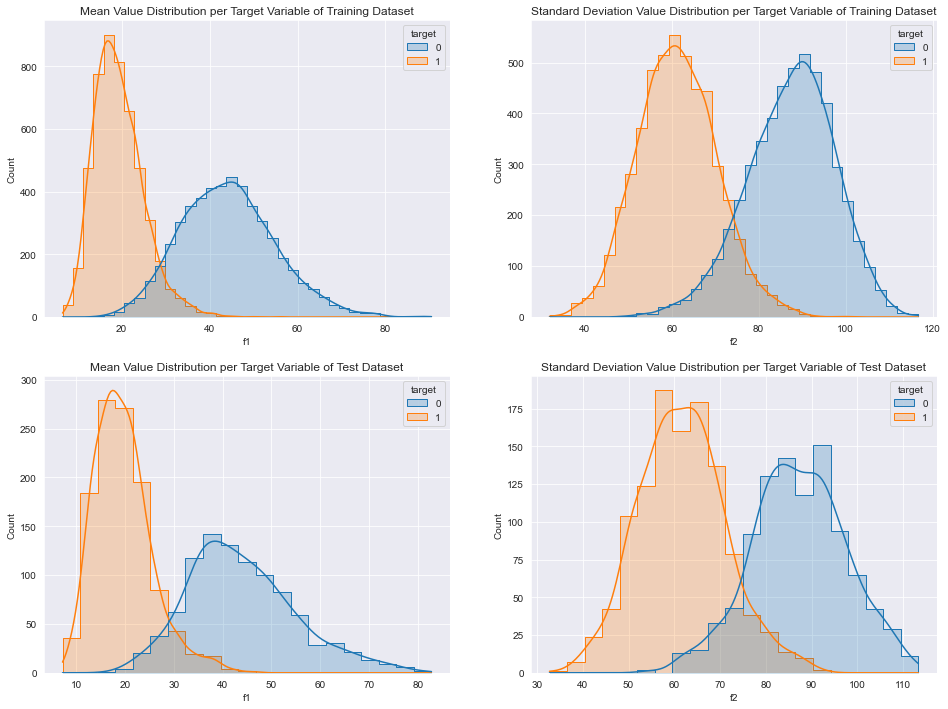

In [350]:
fig , ax  = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
plot = sns.histplot(data = df_train, x = 'f1', hue = 'target', kde = True, element = 'step', ax = ax[0,0])
plot.set(title = 'Mean Value Distribution per Target Variable of Training Dataset')

plot = sns.histplot(data = df_train, x = 'f2', hue = 'target', kde = True, element = 'step', ax = ax[0,1])
plot.set(title = 'Standard Deviation Value Distribution per Target Variable of Training Dataset')

plot = sns.histplot(data = df_test, x = 'f1', hue = 'target', kde = True, element = 'step', ax = ax[1,0])
plot.set(title = 'Mean Value Distribution per Target Variable of Test Dataset')

plot = sns.histplot(data = df_test, x = 'f2', hue = 'target', kde = True, element = 'step', ax = ax[1,1])
plot.set(title = 'Standard Deviation Value Distribution per Target Variable of Test Dataset')


plt.show()
plt.close()

# Task 1:
#### Extract the following two features for each image:

- Feature1: The average brightness of each image (average all pixel brightness values within a whole image array)
- Feature2: The standard deviation of the brightness of each image (standard deviation of all pixel brightness values within a whole image array)


In [351]:
f1_0 = df_train[df_train['target'] == 0]['f1']
f1_1 = df_train[df_train['target'] == 1]['f1']

f2_0 = df_train[df_train['target'] == 0]['f2']
f2_1 = df_train[df_train['target'] == 1]['f2']

f1_0_t = df_test[df_test['target'] == 0]['f1']
f1_1_t = df_test[df_test['target'] == 1]['f1']

f2_0_t = df_test[df_test['target'] == 0]['f2']
f2_1_t = df_test[df_test['target'] == 1]['f2']



In [352]:
print('feature 1 (mean) of digit 0 training data')
f1_0

feature 1 (mean) of digit 0 training data


0       33.616071
1       54.266582
2       29.294643
3       17.382653
4       54.883929
          ...    
4995    27.715561
4996    54.190051
4997    44.278061
4998    47.176020
4999    42.238520
Name: f1, Length: 5000, dtype: float64

In [353]:
print('feature 1 (mean) of digit 1 training data')

f1_1

feature 1 (mean) of digit 1 training data


5000    19.081633
5001    14.798469
5002    17.650510
5003    19.779337
5004    11.651786
          ...    
9995    22.955357
9996    23.348214
9997    26.473214
9998    21.391582
9999    16.881378
Name: f1, Length: 5000, dtype: float64

In [354]:
print('feature 1 (std) of digit 0 training data')

f2_0

feature 1 (std) of digit 0 training data


0       77.445500
1       96.788925
2       71.309391
3       53.650171
4       99.269336
          ...    
4995    70.131105
4996    99.161039
4997    89.491829
4998    92.475450
4999    87.262012
Name: f2, Length: 5000, dtype: float64

In [355]:
print('feature 1 (std) of digit 1 training data')

f2_1

feature 1 (std) of digit 1 training data


5000    62.299114
5001    54.135273
5002    58.482077
5003    61.254475
5004    46.829613
          ...    
9995    67.050882
9996    67.941413
9997    72.054290
9998    65.125044
9999    56.822158
Name: f2, Length: 5000, dtype: float64

# Task 2:

#### You need to calculate all the parameters for the two-class naive bayes classifiers respectively, based upon the 2-D data points you generated in Task 1:

1. Mean of feature1 for digit0
2. Variance of feature1 for digit0
3. Mean of feature2 for digit0
4. Variance of feature2 for digit0
5. Mean of feature1 for digit1
6. Variance of feature1 for digit1
7. Mean of feature2 for digit1
8. Variance of feature2 for digit1

- Feature 1 is the average

- Feature 2 is the standard deviation

In [356]:
# task 1 
d0_mean_of_mean = df_train.iloc[0]['mf1']
# task 2
d0_var_of_mean = df_train.iloc[0]['vf1']
# task 3
d0_mean_of_std = df_train.iloc[0]['mf2']
# task 4
d0_var_of_std = df_train.iloc[0]['vf2']


# task 5 
d1_mean_of_mean = df_train.iloc[-1]['mf1']
# task 6
d1_var_of_mean = df_train.iloc[-1]['vf1']
# task 7 
d1_mean_of_std = df_train.iloc[-1]['mf2']
# task 8
d1_var_of_std = df_train.iloc[-1]['vf2']


d0_mean_of_mean_t = df_test.iloc[0]['mf1']
d0_var_of_mean_t = df_test.iloc[0]['vf1']
d0_mean_of_std_t = df_test.iloc[0]['mf2']
d0_var_of_std_t = df_test.iloc[0]['vf2']


d1_mean_of_mean_t = df_test.iloc[-1]['mf1']
d1_var_of_mean_t = df_test.iloc[-1]['vf1']
d1_mean_of_std_t = df_test.iloc[-1]['mf2']
d1_var_of_std_t = df_test.iloc[-1]['vf2']

In [357]:
df_test

,values,f1,mf1,vf1,f2,mf2,vf2,target
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.211735,43.939139,123.180021,92.404024,87.185777,106.462851,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.960459,43.939139,123.180021,81.635543,87.185777,106.462851,0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.508929,43.939139,123.180021,81.886587,87.185777,106.462851,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67.417092,43.939139,123.180021,105.642764,87.185777,106.462851,0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43.903061,43.939139,123.180021,88.897417,87.185777,106.462851,0
...,...,...,...,...,...,...,...,...
2110,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.743622,19.568063,34.882007,60.656669,61.671272,90.251246,1
2111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.868622,19.568063,34.882007,58.279143,61.671272,90.251246,1
2112,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.605867,19.568063,34.882007,65.155203,61.671272,90.251246,1
2113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22.035714,19.568063,34.882007,67.283620,61.671272,90.251246,1


In [358]:
print(f'digit 0 mean of mean values: {d0_mean_of_mean}')
print(f'digit 0 var of mean values: {d0_var_of_mean}')
print(f'digit 0 mean of std values: {d0_mean_of_std}')
print(f'digit 0 var of std values: {d0_var_of_std}')

digit 0 mean of mean values: 44.19102091836735
digit 0 var of mean values: 115.44599432624402
digit 0 mean of std values: 87.41608865559716
digit 0 var of std values: 102.40184247193528


In [359]:
print(f'digit 1 mean of mean values: {d1_mean_of_mean}')
print(f'digit 1 var of mean values: {d1_var_of_mean}')
print(f'digit 1 mean of std values: {d1_mean_of_std}')
print(f'digit 1 var of std values: {d1_var_of_std}')

digit 1 mean of mean values: 19.34345306122449
digit 1 var of mean values: 31.84102803682736
digit 1 mean of std values: 61.29423730299885
digit 1 var of std values: 83.74486499340965


# Bayes Classification

In [368]:
# gets P(Y/total) = P(Y)
# y is target column
def calculate_prior(df,y,value):
    prior = (len(df[df[y] == value])/len(df))
    return prior

In [361]:
# gets P(X|Y)
# parameters are df=df_train, feat_name=['mean','std'],


In [362]:
# computes the Naive Bayes prediction per sample.
# gets P(X|Y)
def naive_bayes_calc(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2 / (2 * std**2)))

In [363]:
def compute_likelihood(df_train,df_test,target):
    
    df_test = df_test.query("target == "+str(target)).reset_index()
    feature_1 = df_test['f1']
    mean_f01 = df_train.query("target == 0").mf1.unique()[0] 
    var_f01 = df_train.query("target == 0").vf1.unique()[0] 
    mean_f11 = df_train.query("target == 1").mf1.unique()[0] 
    var_f11 = df_train.query("target == 1").vf1.unique()[0] 
    
    
    feature_2 = df_test['f2']
    mean_f02 = df_train.query("target == 0").mf2.unique()[0] 
    var_f02 = df_train.query("target == 0").vf2.unique()[0] 
    mean_f12 = df_train.query("target == 1").mf2.unique()[0] 
    var_f12 = df_train.query("target == 1").vf2.unique()[0]

    iter_size = len(df_test.f1)

    naive_bayes_prob_f1_0 = []
    naive_bayes_prob_f2_0 = []

    for x in range(iter_size):
        naive_bayes_prob_f1_0.append(naive_bayes_calc(feature_1[x],mean_f01,np.sqrt(var_f01)))
        naive_bayes_prob_f2_0.append(naive_bayes_calc(feature_2[x],mean_f02,np.sqrt(var_f02)))

    x_given_y0 = np.array(naive_bayes_prob_f1_0)*np.array(naive_bayes_prob_f2_0)

    
    naive_bayes_prob_f1_1 = []
    naive_bayes_prob_f2_1 = []

    for x in range(iter_size):
        naive_bayes_prob_f1_1.append(naive_bayes_calc(feature_1[x],mean_f11,np.sqrt(var_f11)))
        naive_bayes_prob_f2_1.append(naive_bayes_calc(feature_2[x],mean_f12,np.sqrt(var_f12)))
       
    x_given_y1 = np.array(naive_bayes_prob_f1_1)*np.array(naive_bayes_prob_f2_1)

    return x_given_y0,x_given_y1

In [369]:
prior_train_0 = calculate_prior(df_train,'target',0)
prior_train_1 = calculate_prior(df_train,'target',1)

prob_x_given_y0 = compute_likelihood(df_train,df_test,0)
prob_x_given_y1 = compute_likelihood(df_train,df_test,1)

probability_y00 = prob_x_given_y0[0] * prior_train_0
probability_y01 = prob_x_given_y0[1] * prior_train_1

probability_y10 = prob_x_given_y1[0] * prior_train_0
probability_y11 = prob_x_given_y1[1] * prior_train_1

In [370]:


df_test.query('target == 0')['prob_0'] = np.array(probability_y00)
df_test.query('target == 0')['prob_1'] = np.array(probability_y01)
df_test.query('target == 1')['prob_0'] = np.array(probability_y10)
df_test.query('target == 1')['prob_1'] = np.array(probability_y11)



/var/folders/fh/j80_xmgd0t94glsz9_cgt37w0000gn/T/ipykernel_8854/397118536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.query('target == 0')['prob_0'] = np.array(probability_y00)
/var/folders/fh/j80_xmgd0t94glsz9_cgt37w0000gn/T/ipykernel_8854/397118536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.query('target == 0')['prob_1'] = np.array(probability_y01)
/var/folders/fh/j80_xmgd0t94glsz9_cgt37w0000gn/T/ipykernel_8854/397118536.py:3: SettingWithCopyWarning: 
A value is trying to 

In [380]:
df_test

,values,f1,mf1,vf1,f2,mf2,vf2,target,match,pred
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",47.211735,43.939139,123.180021,92.404024,87.185777,106.462851,0,True,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.960459,43.939139,123.180021,81.635543,87.185777,106.462851,0,True,0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.508929,43.939139,123.180021,81.886587,87.185777,106.462851,0,True,0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",67.417092,43.939139,123.180021,105.642764,87.185777,106.462851,0,True,0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",43.903061,43.939139,123.180021,88.897417,87.185777,106.462851,0,True,0
...,...,...,...,...,...,...,...,...,...,...
2110,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.743622,19.568063,34.882007,60.656669,61.671272,90.251246,1,True,1
2111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.868622,19.568063,34.882007,58.279143,61.671272,90.251246,1,True,1
2112,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.605867,19.568063,34.882007,65.155203,61.671272,90.251246,1,True,1
2113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",22.035714,19.568063,34.882007,67.283620,61.671272,90.251246,1,True,1


In [372]:
target_match = []
pred_value = []
len_lists = [len(probability_y00),len(probability_y10)]

for list in len_lists:
    for i in range(list):
        if list == len_lists[0]:
            if probability_y00[i] > probability_y01[i]:
                pred_value.append(True)
            else:
                pred_value.append(False)

            target_match.append(probability_y00[i] > probability_y01[i])
        if list == len_lists[1]:
            if probability_y10[i] < probability_y11[i]:
                pred_value.append(True)
            else:
                pred_value.append(False)
            target_match.append(probability_y10[i] < probability_y11[i])

#prediction_0 = [0 if p0 > p1 else 1 for p0, p1 in zip(probability_y00, probability_y01)]
#prediction_1 = [1 if p1 > p0 else 0 for p0, p1 in zip(probability_y10, probability_y11)]

In [379]:
df_test['pred'] = pred_value
df_test['match'] = target_match#numpy.where(df_test['pred'] ==  df_test['target'], True, False)

In [383]:
for x in df_test.target.unique():
    print(df_test.query('target == '+str(x)).match.value_counts()/len(df_test.query('target == '+str(x))))
    cm = confusion_matrix(df_test.query('target == '+str(x))['target'],df_test.query('target == '+str(x))['pred'])
    print(cm)

True     0.917347
False    0.082653
Name: match, dtype: float64
[[899  81]
 [  0   0]]
True     0.923348
False    0.076652
Name: match, dtype: float64
[[   0    0]
 [  87 1048]]


In [377]:
gnb = GaussianNB()
sc = StandardScaler()  

for x in df_train.target.unique():
    
    X_train = df_train[df_train['target'] == x][['f1','f2']]
    X_test = df_test[df_test['target'] == x][['f1','f2']]

    x_train = sc.fit_transform(X_train)  
    x_test = sc.transform(X_test) 

    y_train = np.array(df_train[df_train['target'] == x]['target'])
    y_test = np.array(df_test[df_test['target'] == x]['target'])


    y_pred = gnb.fit(x_train, y_train).predict(x_test)    
    print(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)  
    print(cm)

1.0
[[980]]
1.0
[[1135]]
